#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

In [23]:
print('radha')

radha


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [25]:
df=pd.read_csv('./data/stud.csv')
print(df.shape)
df.head()

(1000, 8)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [27]:
df.duplicated().sum()

np.int64(0)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [40]:
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']
num_features=[feature for feature in df.columns if df[feature].dtype!='O']

In [48]:
for feature in cat_features:
    print(df[feature].value_counts())
    print("="*120)

gender
female    518
male      482
Name: count, dtype: int64
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
test_preparation_course
none         642
completed    358
Name: count, dtype: int64


In [49]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [53]:
df['total_score']=df.math_score+df.reading_score+df.writing_score
df['average_score']=np.round(df.total_score/3,2)

In [55]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [72]:
reading_full = df[df['reading_score'] == 100].shape[0]
writing_full = df[df['writing_score'] == 100].shape[0]
math_full = df[df['math_score'] == 100].shape[0]

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [74]:
reading_less_20 = df[df['reading_score'] <= 20].shape[0]
writing_less_20 = df[df['writing_score'] <= 20].shape[0]
math_less_20 = df[df['math_score'] <= 20].shape[0]

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


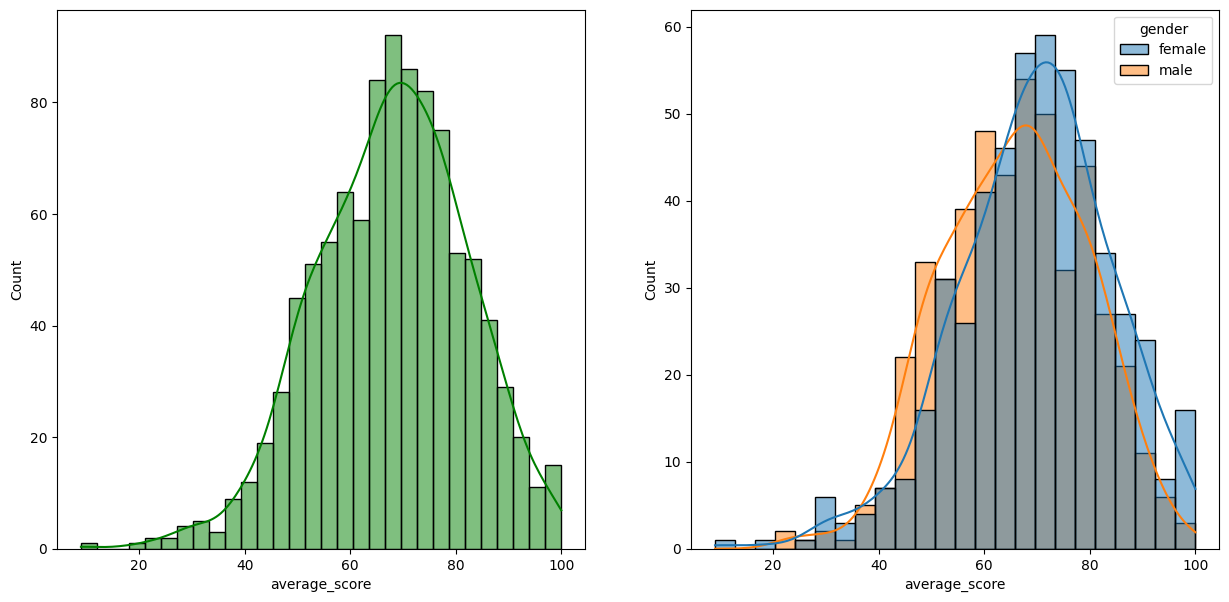

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

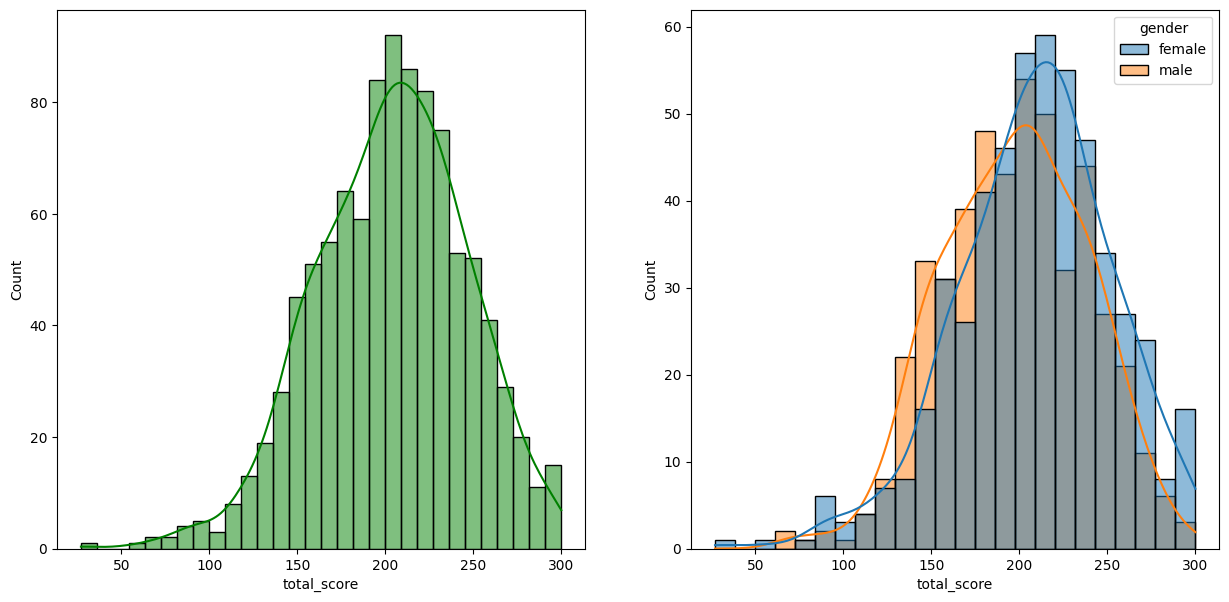

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

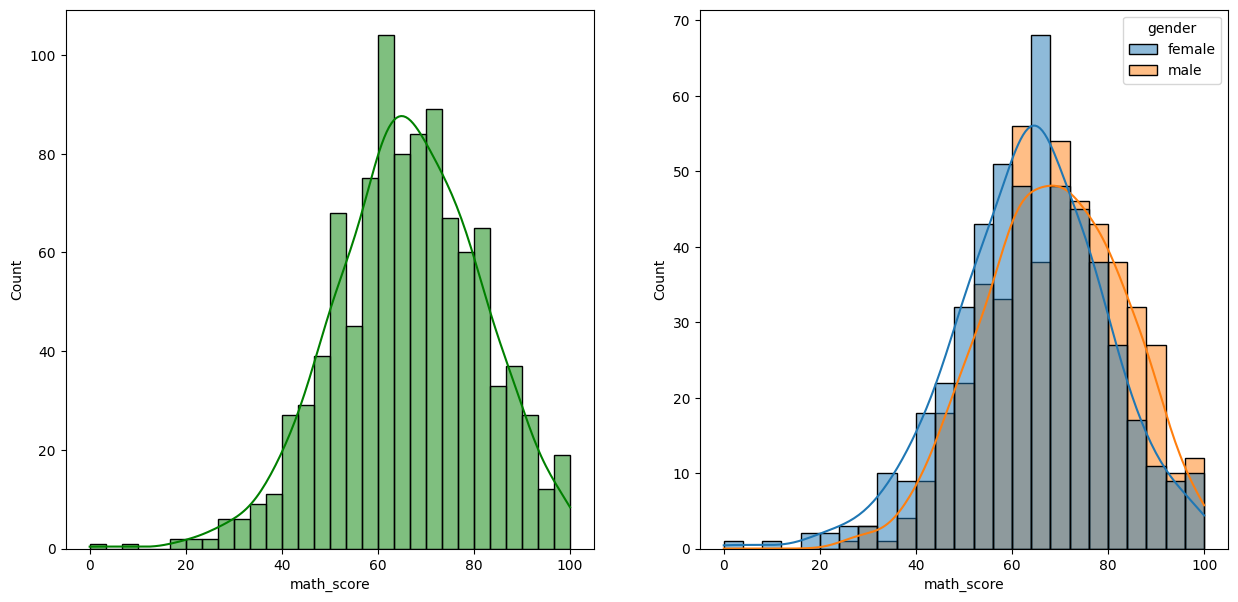

In [93]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='math_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='math_score',kde=True,hue='gender')
plt.show()

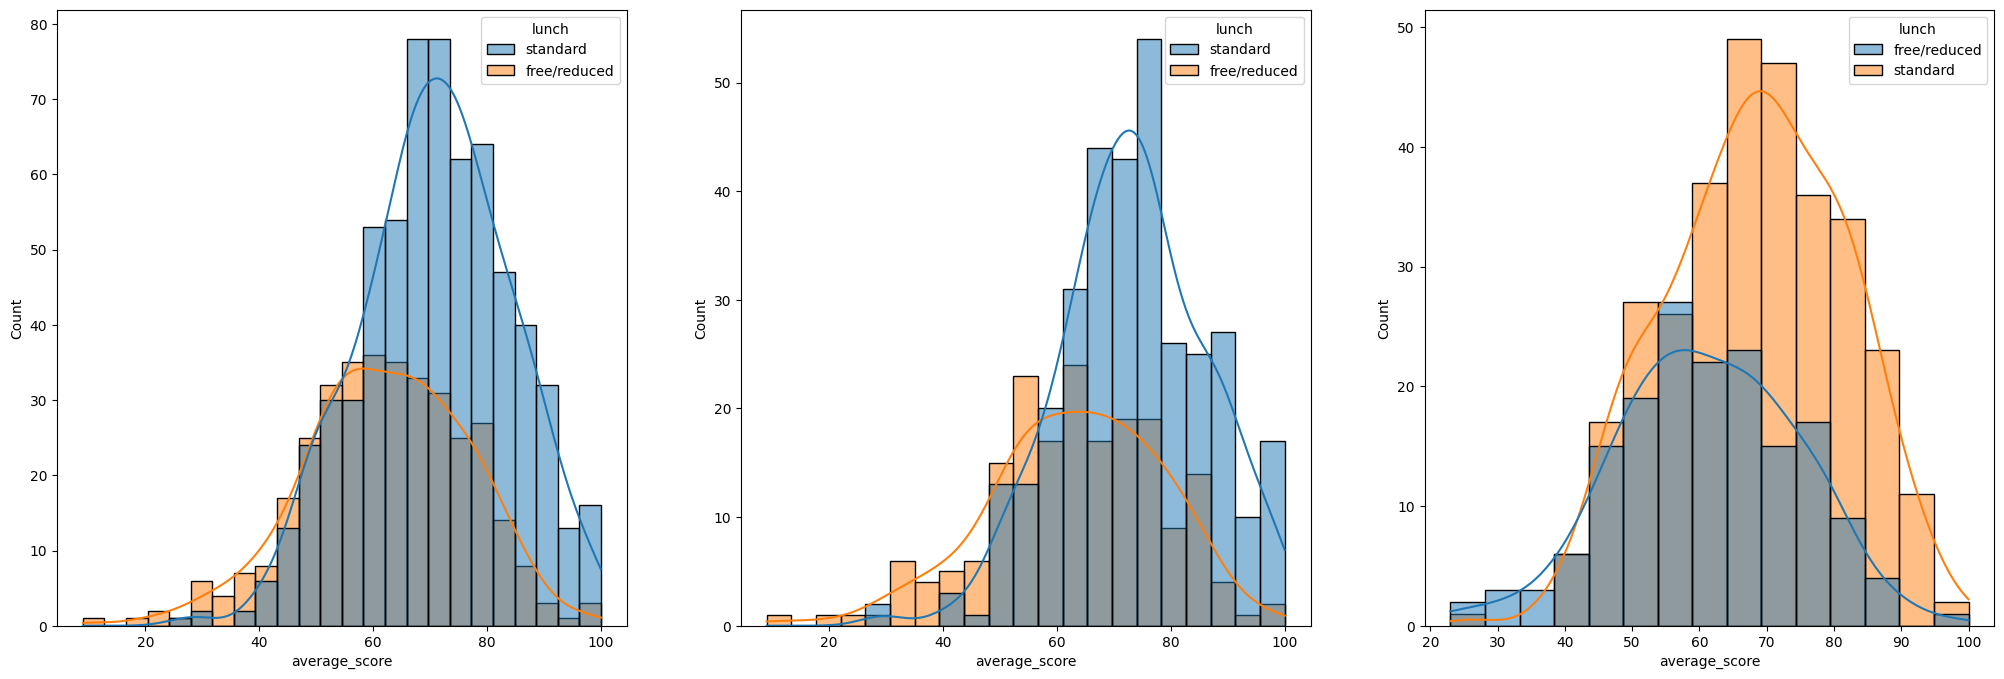

In [83]:
plt.subplots(1,3,figsize=(25,8))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

## standard lunch helps perform well in exam

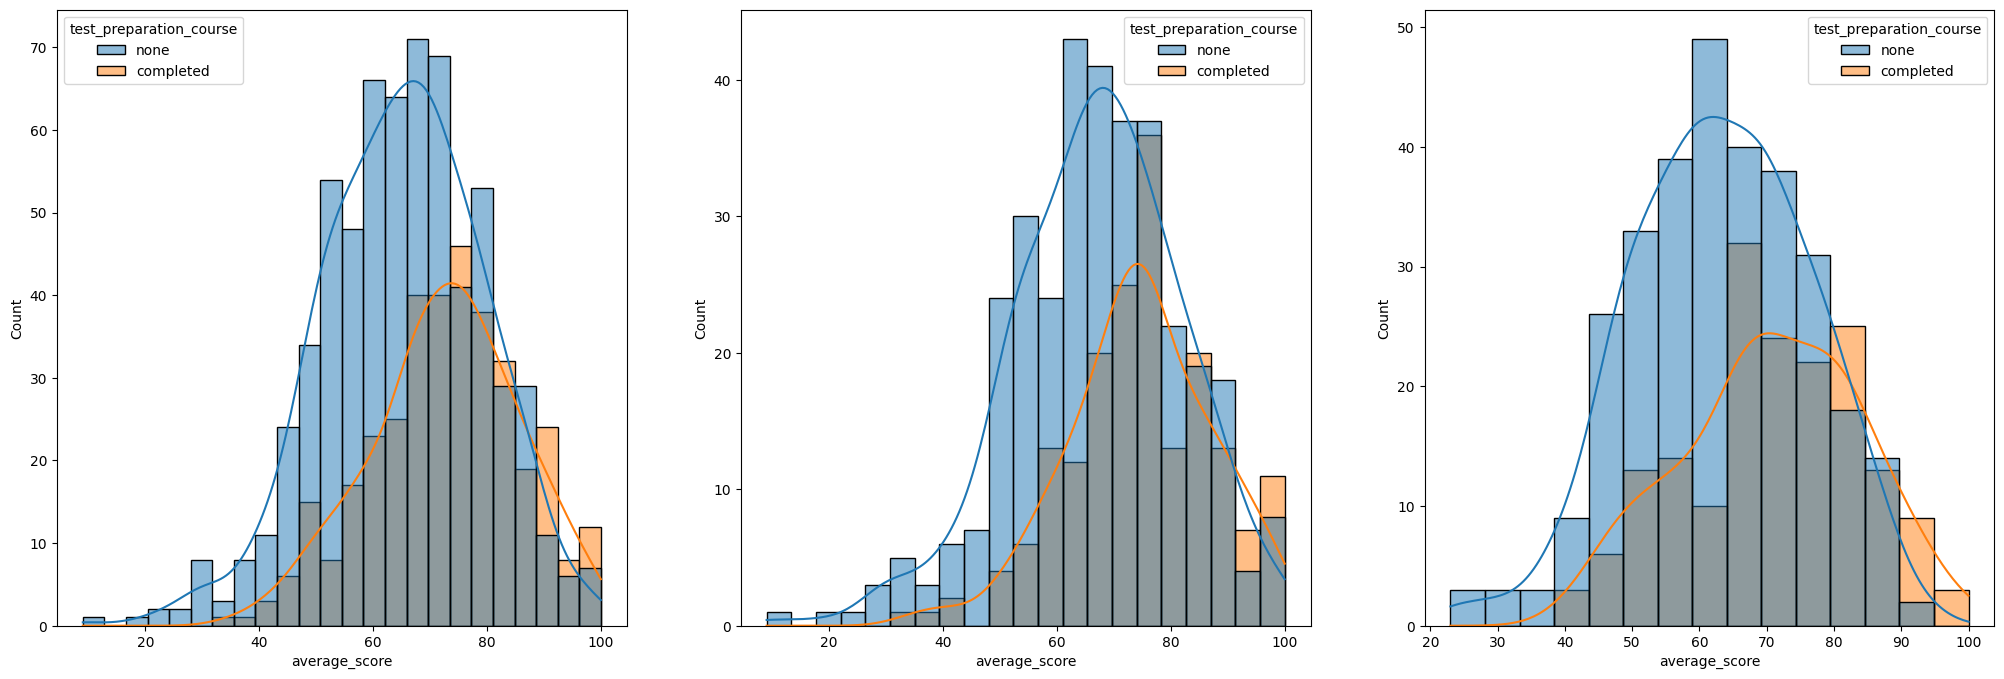

In [88]:
plt.subplots(1,3,figsize=(25,8))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='test_preparation_course')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='test_preparation_course')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='test_preparation_course')
plt.show()

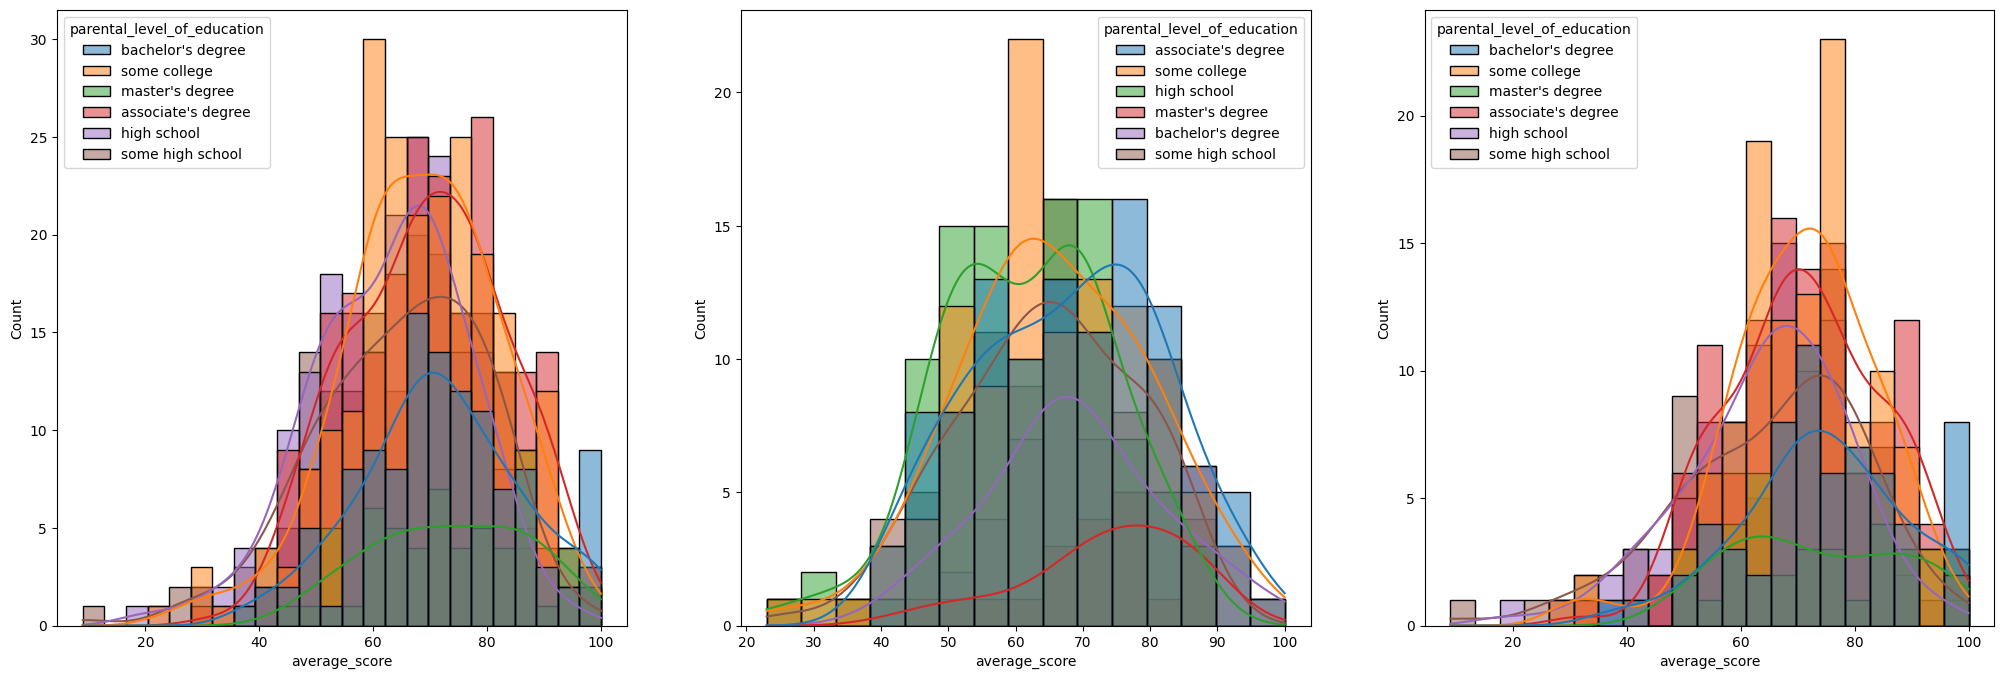

In [91]:
plt.subplots(1,3,figsize=(25,8))
plt.subplot(131)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

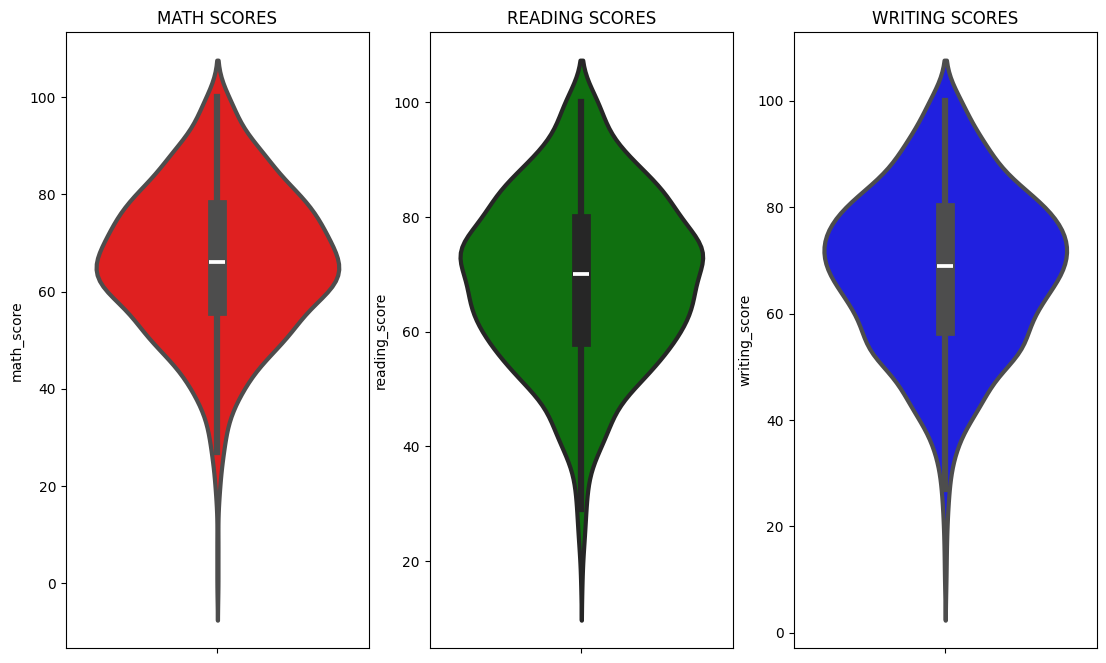

In [92]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

In [96]:
df.race_ethnicity.value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [101]:
df.groupby('race_ethnicity')['average_score'].mean()

race_ethnicity
group A    62.992135
group B    65.468579
group C    67.131567
group D    69.179389
group E    72.752000
Name: average_score, dtype: float64

In [102]:
df.groupby('race_ethnicity')['math_score'].mean()

race_ethnicity
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: math_score, dtype: float64

In [103]:
df.groupby('race_ethnicity')['reading_score'].mean()

race_ethnicity
group A    64.674157
group B    67.352632
group C    69.103448
group D    70.030534
group E    73.028571
Name: reading_score, dtype: float64

In [104]:
df.groupby('race_ethnicity')['writing_score'].mean()

race_ethnicity
group A    62.674157
group B    65.600000
group C    67.827586
group D    70.145038
group E    71.407143
Name: writing_score, dtype: float64

## group E performs well

In [107]:
df.groupby('parental_level_of_education')['average_score'].mean()

parental_level_of_education
associate's degree    69.568964
bachelor's degree     71.923983
high school           63.097194
master's degree       73.598644
some college          68.476106
some high school      65.107654
Name: average_score, dtype: float64

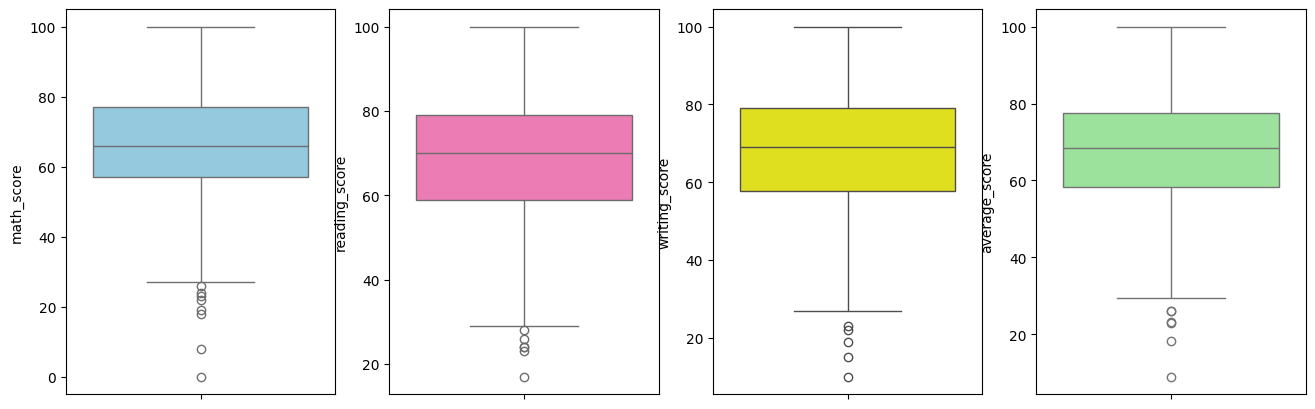

In [108]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

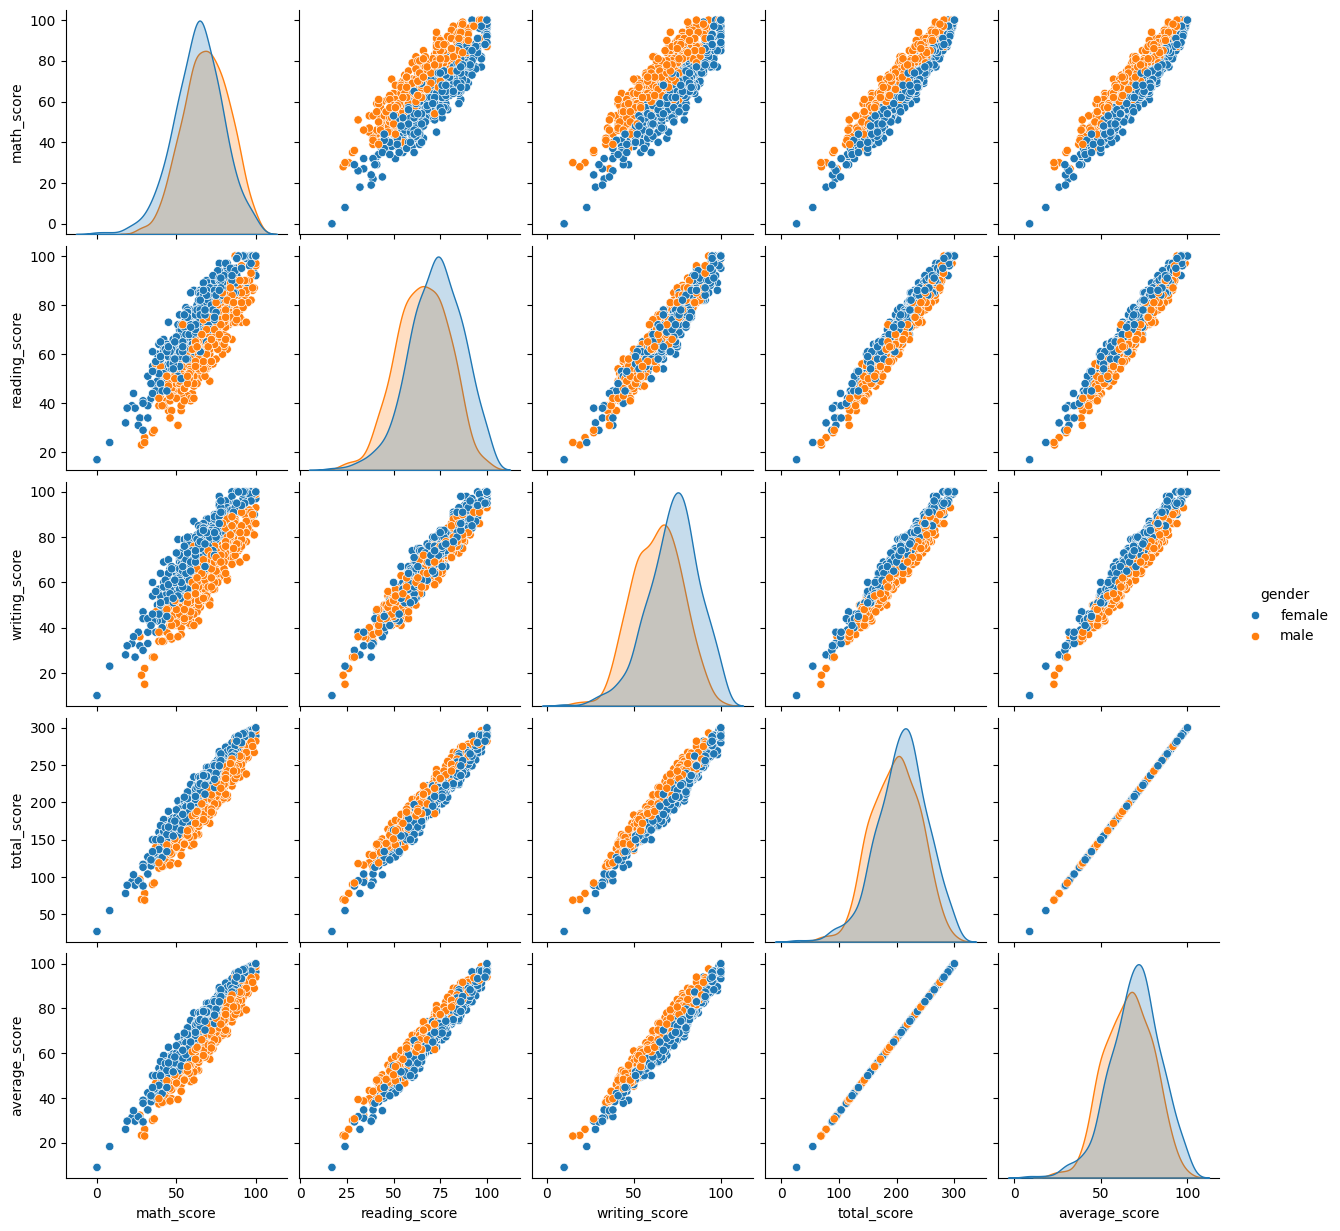

In [109]:
sns.pairplot(df,hue='gender')

## all scores increases linearly with each other

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.